In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
tragitti = pd.read_csv('csv/alldata_cleared.csv', index_col=False)

In [2]:
# dal 4 maggio 2020 l'Italia ha gradualmente allentato le restrizioni imposte per il periodo di lockdown

tragitti = tragitti[((tragitti['Month'] == 5) & (tragitti['Day'] >= 4)) | (tragitti['Month'] > 5)]
len(tragitti)

52703

In [3]:
tragitti.head()

,Lat,Lon,Elat,Elon,ADistance,FDistance,Year,Month,Day,Hour,...,Second,Public,Public2,Bike,Foot,Car,Car2Go,Enjoy,Car2GoFreeCars,EnjoyFreeCars
52447,45.474498,9.180897,45.496506,9.224699,4.200852,5.1607,2020,5,4,0,...,16,33,0,25,69,12,16,17,936,645
52448,45.443876,9.184415,45.484429,9.187623,4.516006,5.1087,2020,5,4,0,...,16,28,0,27,68,14,20,20,936,645
52449,45.450619,9.182201,45.502500,9.181618,5.768806,6.3926,2020,5,4,0,...,16,37,0,36,86,18,22,19,936,645
52450,45.504757,9.188484,45.468675,9.156064,4.741568,5.7370,2020,5,4,0,...,16,48,0,26,77,14,18,23,936,645
52451,45.480547,9.195806,45.501923,9.203171,2.445134,2.9488,2020,5,4,0,...,16,35,0,16,39,9,10,21,936,640


In [4]:
# Massima e minimia distanza di un tragitto (FDistance e' la lunghezza in km del tragitto a piedi)
min = tragitti['FDistance'].min()
max = tragitti['FDistance'].max()
print(min, max) # km

(2.1375000000000002, 10.9932)


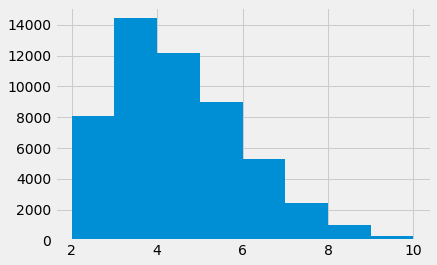

In [5]:
# Distribuzione in base alla lunghezza delle tratte
tragitti['FDistance'].hist(bins=np.hstack((np.arange(int(min), int(max+1), 1))))
plt.show()

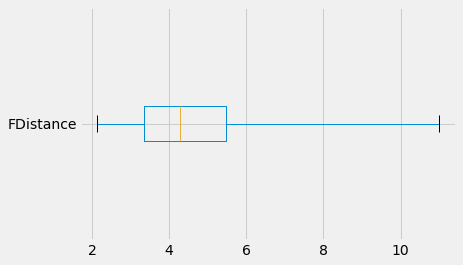

In [6]:
tragitti['FDistance'].plot.box(vert=False, whis='range')
plt.show()

In [7]:
# Velocita' media durante il giorno
def vmedia_giorno(tragitti, mezzo):
    ore = range(7, 24)
    media_giorno = []
    for ora in ore:
        tragitti_fascia_oraria = tragitti[tragitti['Hour'] == ora]
        velocita_media_oraria = (tragitti_fascia_oraria['FDistance'] * 60.) / tragitti_fascia_oraria[mezzo]
        media_giorno.append(velocita_media_oraria.mean())
    return media_giorno

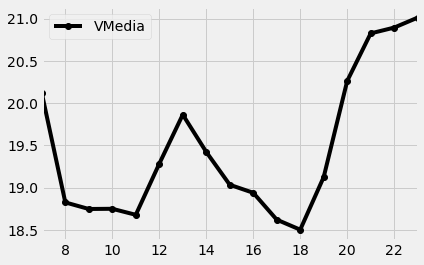

In [8]:
# Velocita' media durante il giorno in auto
pd.DataFrame(vmedia_giorno(tragitti, 'Car'), index=range(7, 24), columns=['VMedia']).plot(marker='o', color='black')
plt.show()

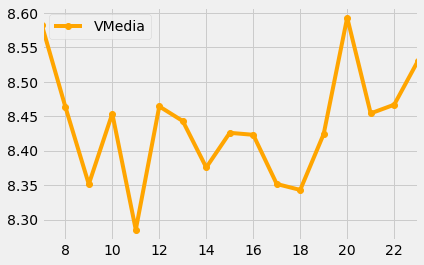

In [9]:
# Velocita' media durante il giorno coi mezzi pubblici
pd.DataFrame(vmedia_giorno(tragitti, 'Public'), index=range(7, 24), columns=['VMedia']).plot(marker='o', color='orange')
plt.show()

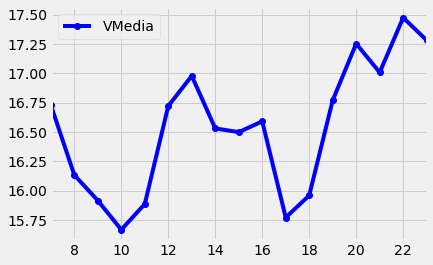

In [10]:
# Velocita' media durante il giorno con Car2Go
pd.DataFrame(vmedia_giorno(tragitti[tragitti['Car2Go'] != 0], 'Car2Go'), index=range(7, 24), columns=['VMedia']).plot(marker='o', color='blue')
plt.show()

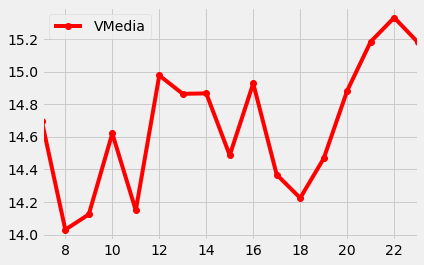

In [11]:
# Velocita' media durante il giorno con Enjoy
pd.DataFrame(vmedia_giorno(tragitti[tragitti['Enjoy'] != 0], 'Enjoy'), index=range(7, 24), columns=['VMedia']).plot(marker='o', color='red')
plt.show()

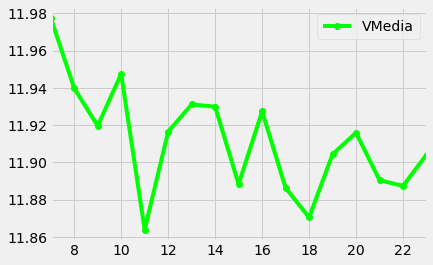

In [12]:
# Velocita' media durante il giorno in bici (dovrebbe essere costante dato che e' statica)
pd.DataFrame(vmedia_giorno(tragitti, 'Bike'), index=range(7, 24), columns=['VMedia']).plot(marker='o', color='lime')
plt.show()

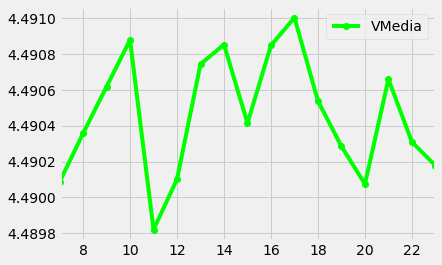

In [13]:
# Velocita' media durante il giorno a piedi (dovrebbe essere costante dato che e' statica)
pd.DataFrame(vmedia_giorno(tragitti, 'Foot'), index=range(7, 24), columns=['VMedia']).plot(marker='o', color='lime')
plt.show()

In [14]:
# Media del tempo per raggiungere una macchina Car2Go
media_tempo_macchina = tragitti['Car2Go'] - tragitti['Car']
media_tempo_macchina[media_tempo_macchina > 0].describe()

count    47390.000000
mean         4.519055
std          3.589812
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         42.000000
dtype: float64

In [15]:
# Media del tempo per raggiungere una macchina Enjoy
media_tempo_macchina = tragitti['Enjoy'] - tragitti['Car']
media_tempo_macchina[media_tempo_macchina > 0].describe()

count    49275.000000
mean         6.800162
std          4.503820
min          1.000000
25%          4.000000
50%          6.000000
75%          9.000000
max         43.000000
dtype: float64

In [16]:
# Volte in cui i mezzi pubblici sono stati piu' veloci della macchina
errore_moovit = 12 # moovit restituiva spesse volte valori < 12 minuti quando il risultato non era coerente
tragitti_public_better_than_car = tragitti[(tragitti['Public'] <= tragitti['Car']) & (tragitti['Public'] > errore_moovit)]
len(tragitti_public_better_than_car)

245

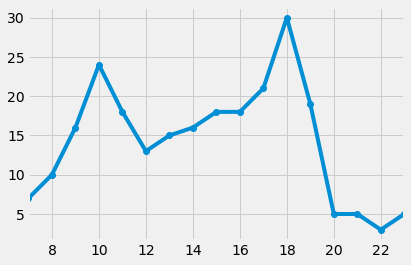

In [17]:
# Orario in cui si sono concentrate maggiormente le volte in cui i mezzi pubblici sono stati piu' veloci della macchina
tragitti_public_better_than_car[tragitti_public_better_than_car['Hour'] >= 7]['Hour'].value_counts().sort_index().plot(marker='o')
plt.show()

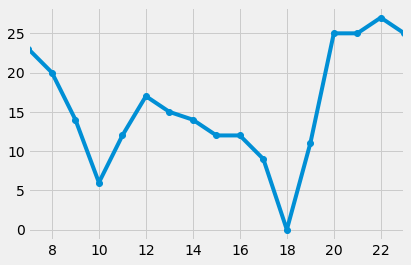

In [18]:
# Invertendo il grafico sull'asse y, si vede chiaramente la somiglianza con il grafico della velocita' media:
# i mezzi pubblici hanno performato meglio della macchina durante le ore di maggior traffico,
# dove la velocita' media in macchina cola a picco
(tragitti_public_better_than_car[tragitti_public_better_than_car['Hour'] >= 7]['Hour'].value_counts().sort_index() * -1 + 30).plot(marker='o')
plt.show()